In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from utils import *

In [20]:
DIR = "data/round-1/"

In [21]:
df1 = pd.read_csv(DIR+"prices_round_1_day_-2.csv", delimiter=';')
df2 = pd.read_csv(DIR+"prices_round_1_day_-1.csv", delimiter=';')
df3 = pd.read_csv(DIR+"prices_round_1_day_0.csv", delimiter=';')
df4 = pd.read_csv(DIR+"price1.csv", delimiter=";")

In [22]:
price = pd.concat((df1, df2, df3, df4))

In [5]:
RESIN = price.loc[price["product"]=="RAINFOREST_RESIN"].reset_index(drop=True)
KELP = price.loc[price["product"]=="KELP"].reset_index(drop=True)
SQUID = price.loc[price["product"]=="SQUID_INK"].reset_index(drop=True)

In [6]:
mp = get_midprice_mm(KELP)
KELP["mid_price"] = mp
mp2 = get_midprice_mm(SQUID)
SQUID["mid_price"] = mp2

In [7]:
kelp = KELP.loc[KELP["day"]==1]
squid = SQUID.loc[SQUID["day"]==1]

In [8]:
# # get price data

# infile = r"data/round-1/log1.log"
# fp = open(infile)
# start = False
# start_signal = "Activities log"
# end_signal = "Trade History"
# outfile = DIR+"log1-prices.txt"

# with open(outfile, "w") as f:

#     for line in fp:

#         if not start:
#             if start_signal in line:
#                 start = True

#         elif start:
#             if end_signal in line:
#                 break
            
#             f.write(line)
             
# f.close()
# fp.close()


In [9]:
PnL = pd.read_csv(DIR+"log1-prices.txt", delimiter=';')

In [17]:
# the entire trade history (not just own trades)
infile = r"data/round-1/log1.log"
hist = get_tradehistory(infile)
resin_hist = get_mytrades(hist)
kelp_hist = get_mytrades(hist, "KELP")
kelp_hist = kelp_hist.merge(kelp[["timestamp", "mid_price"]], on="timestamp", how="left")
squid_hist = get_mytrades(hist, "SQUID_INK")
squid_hist = squid_hist.merge(squid[["timestamp", "mid_price"]], on="timestamp", how="left")

In [18]:
eric = DIR+"ericliu.log"
hist_eric = get_tradehistory(eric)
resin_eric = get_mytrades(hist_eric)
kelp_eric = get_mytrades(hist_eric, "KELP")
PnL_eric = pd.read_csv(DIR+"ericliu.csv", delimiter=';')

### RESIN

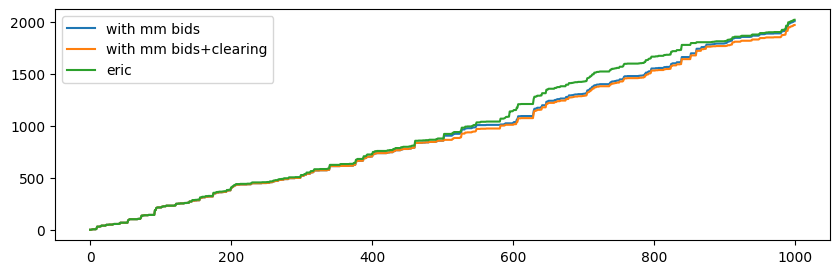

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(kelp["timestamp"]/100, pnL_resin.loc[pnL_resin["product"]=="RAINFOREST_RESIN"]["profit_and_loss"], label="with mm bids")
plt.plot(kelp["timestamp"]/100, PnL_eric.loc[PnL_eric["product"]=="RAINFOREST_RESIN"]["profit_and_loss"], label="eric")
plt.legend()
plt.show()

### KELP

In [52]:
kelp_buy = kelp_hist.loc[kelp_hist["buyer"]=="SUBMISSION"]
kelp_sell = kelp_hist.loc[kelp_hist["seller"]=="SUBMISSION"]
buy_time_kelp = list(kelp_buy["timestamp"])
buy_price_kelp = list(kelp_buy["price"])
sell_time_kelp = list(kelp_sell["timestamp"])
sell_price_kelp = list(kelp_sell["price"])

In [53]:
kelp_buy_eric = kelp_eric.loc[kelp_eric["buyer"]=="SUBMISSION"]
kelp_sell_eric = kelp_eric.loc[kelp_eric["seller"]=="SUBMISSION"]
buy_time_eric = list(kelp_buy_eric["timestamp"])
buy_price_eric = list(kelp_buy_eric["price"])
sell_time_eric = list(kelp_sell_eric["timestamp"])
sell_price_eric = list(kelp_sell_eric["price"])

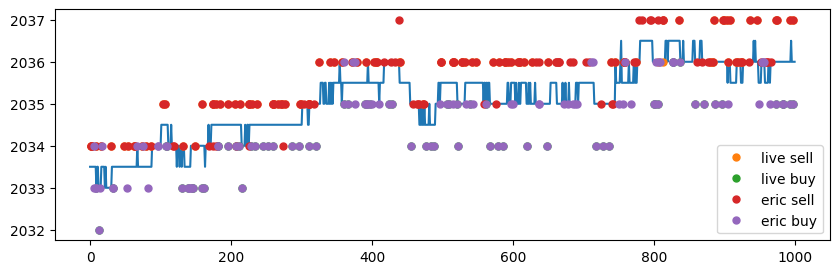

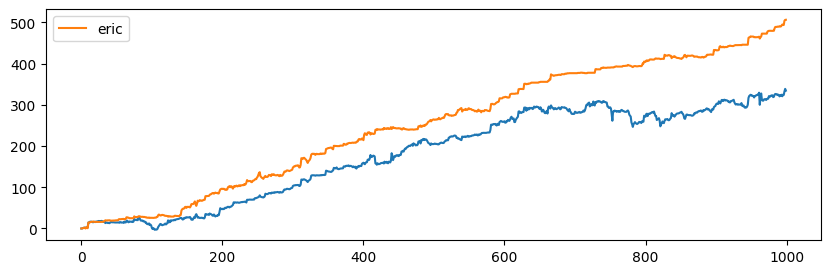

In [54]:
plt.figure(figsize=(10,3))
plt.plot(kelp["timestamp"]/100, kelp["mid_price"])
plt.plot(np.array(sell_time_kelp)/100, sell_price_kelp, lw=0, ms=10, marker='.', label="live sell")
plt.plot(np.array(buy_time_kelp)/100, buy_price_kelp, lw=0, ms=10, marker='.', label="live buy")
plt.plot(np.array(sell_time_eric)/100, sell_price_eric, lw=0, ms=10, marker='.', label="eric sell")
plt.plot(np.array(buy_time_eric)/100, buy_price_eric, lw=0, ms=10, marker='.', label="eric buy")
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.plot(kelp["timestamp"]/100, PnL.loc[PnL["product"]=="KELP"]["profit_and_loss"])
plt.plot(kelp["timestamp"]/100, PnL_eric.loc[PnL_eric["product"]=="KELP"]["profit_and_loss"], label="eric")
plt.legend()
plt.show()

In [18]:
kelp_hist

,timestamp,buyer,seller,symbol,currency,price,quantity,mid_price
0,100,,SUBMISSION,KELP,SEASHELLS,2034,1,2033.5
1,200,,SUBMISSION,KELP,SEASHELLS,2034,1,2033.5
2,300,,SUBMISSION,KELP,SEASHELLS,2034,1,2033.5
3,800,SUBMISSION,,KELP,SEASHELLS,2033,3,2033.5
4,900,,SUBMISSION,KELP,SEASHELLS,2034,15,2033.0
...,...,...,...,...,...,...,...,...
167,98300,SUBMISSION,,KELP,SEASHELLS,2035,3,2036.0
168,99200,SUBMISSION,,KELP,SEASHELLS,2035,2,2036.0
169,99300,,SUBMISSION,KELP,SEASHELLS,2037,1,2036.0
170,99600,,SUBMISSION,KELP,SEASHELLS,2037,12,2036.0


### SQUID

In [29]:
squid_buy = squid_hist.loc[squid_hist["buyer"]=="SUBMISSION"]
squid_sell = squid_hist.loc[squid_hist["seller"]=="SUBMISSION"]
buy_time = list(squid_buy["timestamp"])
buy_price = list(squid_buy["price"])
sell_time = list(squid_sell["timestamp"])
sell_price = list(squid_sell["price"])

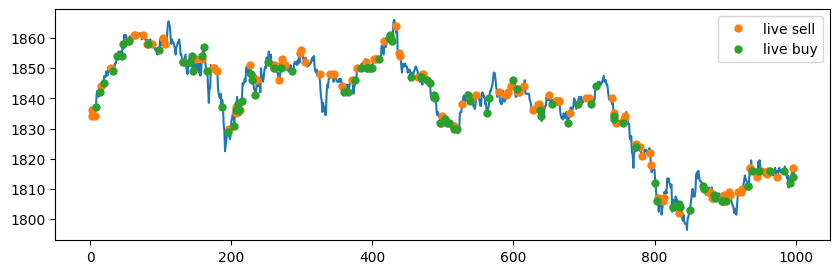

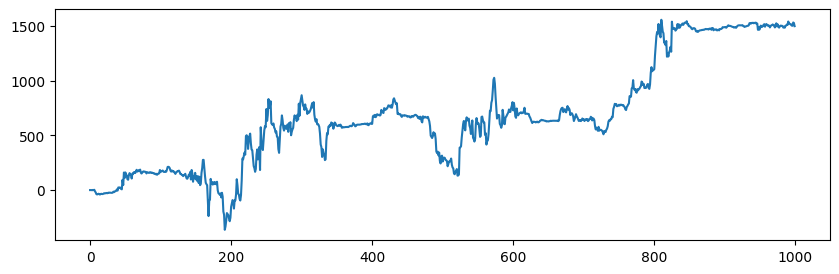

In [30]:
plt.figure(figsize=(10,3))
plt.plot(kelp["timestamp"]/100, squid["mid_price"])
plt.plot(np.array(sell_time)/100, sell_price, lw=0, ms=10, marker='.', label="live sell")
plt.plot(np.array(buy_time)/100, buy_price, lw=0, ms=10, marker='.', label="live buy")
plt.legend()
plt.show()
plt.figure(figsize=(10,3))
plt.plot(squid["timestamp"]/100, PnL.loc[PnL["product"]=="SQUID_INK"]["profit_and_loss"])
plt.show()

#### Correlation analysis and prediction

In [9]:
k = (KELP["mid_price"] - KELP["mid_price"].mean()) / KELP["mid_price"].std()
s = (SQUID["mid_price"] - SQUID["mid_price"].mean()) / SQUID["mid_price"].std()

In [10]:
k.corr(s)

np.float64(-0.6107833037039924)

<Axes: >

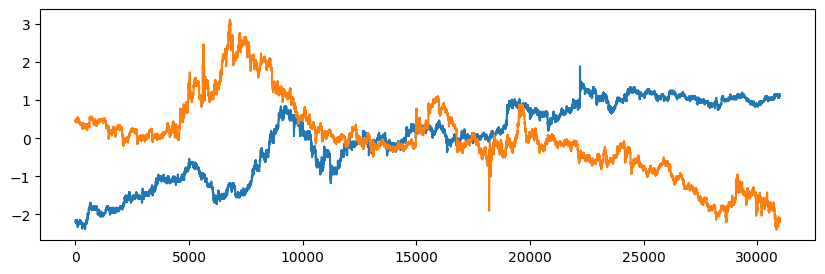

In [25]:
plt.figure(figsize=(10,3))
k.plot()
s.plot()

In [60]:
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame({'kelp': KELP["mid_price"], 'squid': SQUID["mid_price"]})

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)


time_step = 60  

X, y = create_dataset(scaled_data, time_step)

train_size = X.shape[0] - 1000
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=2)) 

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10


/Users/karin/Desktop/Prosperity3/Prosperity3/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


936/936 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - loss: 0.0151
Epoch 2/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 0.0021
Epoch 3/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - loss: 0.0015
Epoch 4/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - loss: 9.6506e-04
Epoch 5/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - loss: 7.3549e-04
Epoch 6/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - loss: 5.9133e-04
Epoch 7/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - loss: 5.7322e-04
Epoch 8/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - loss: 5.4283e-04
Epoch 9/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - loss: 5.4126e-04
Epoch 10/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - loss: 5.3957e-04


In [17]:
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [18]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f'RMSE: {rmse}')


RMSE: 2.0871978804185543


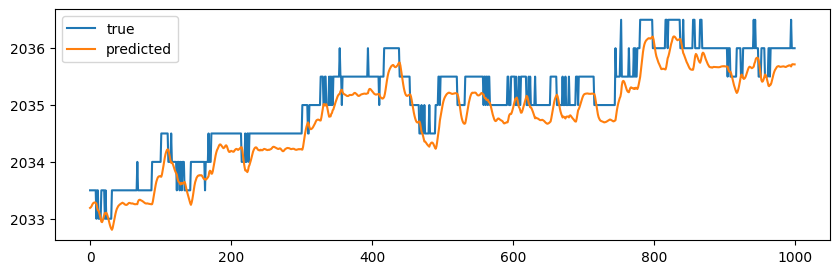

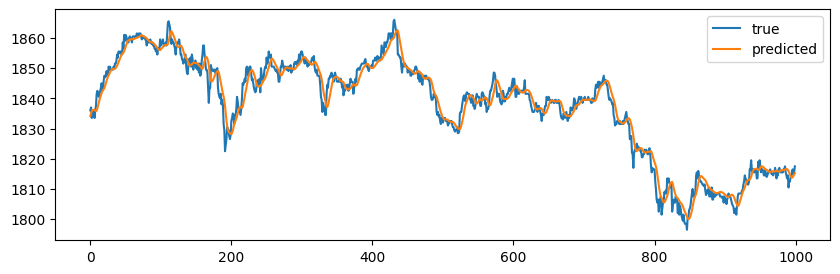

In [75]:
plt.figure(figsize=(10, 3))
plt.plot(kelp["timestamp"]/100, kelp["mid_price"], label="true")
plt.plot(y_pred_rescaled[:, 0], label='predicted')
plt.legend()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(squid["timestamp"]/100, squid["mid_price"], label="true")
plt.plot(y_pred_rescaled[:, 1], label='predicted')
plt.legend()
plt.show()